In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler


In [4]:
np.random.seed(5)
tf.random.set_seed(5)

In [5]:
dataset = pd.read_csv("dataset_timeseries.csv")
dataset.head()

,1455.219971
0,1399.420044
1,1402.109985
2,1403.449951
3,1441.469971
4,1457.599976


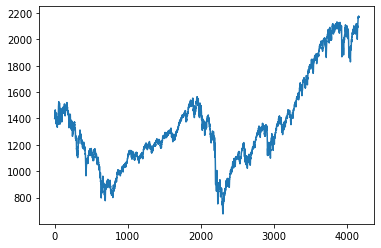

In [6]:
plt.plot(dataset)

In [8]:
scaler = MinMaxScaler(feature_range=(0,1))
dataset = scaler.fit_transform(dataset)

In [11]:
#SPLIT DATASET

train_size = int(len(dataset) *0.67)

train_data = dataset[:train_size]
test_data = dataset[train_size:]

# train_data.shape
# test_data.shape

(1377, 1)

In [12]:
#GET LOOK BACK 
def create_dataset(dataset, look_back):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
      a = dataset[i:(i+look_back), 0]
      dataX.append(a)
      dataY.append(dataset[i + look_back, 0])
    return np.array(dataX), np.array(dataY) 

In [17]:
look_back = 10
trainX, trainY = create_dataset(train_data, look_back)
testX, testY = create_dataset(test_data, look_back) 

print(trainX.shape)

(2782, 10)


In [18]:
#-- Reshape input to be [samples, time steps, features]: --#
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [19]:
print(trainX.shape)

(2782, 1, 10)


In [ ]:
trainX[:5]

In [22]:
model = Sequential()
model.add(LSTM(32,input_shape=[1,look_back]))
model.add(Dense(1))

In [23]:
model.compile(optimizer='adam', metrics=['accuracy'],loss='mean_squared_error')
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 32)                5504      
_________________________________________________________________
dense (Dense)                (None, 1)                 33        
Total params: 5,537
Trainable params: 5,537
Non-trainable params: 0
_________________________________________________________________


In [24]:
history = model.fit(trainX,trainY,epochs=50, batch_size=10, verbose=2)

Epoch 1/50
279/279 - 7s - loss: 0.0054 - accuracy: 3.5945e-04
Epoch 2/50
279/279 - 1s - loss: 3.1951e-04 - accuracy: 3.5945e-04
Epoch 3/50
279/279 - 1s - loss: 2.9479e-04 - accuracy: 3.5945e-04
Epoch 4/50
279/279 - 1s - loss: 2.7966e-04 - accuracy: 3.5945e-04
Epoch 5/50
279/279 - 1s - loss: 2.5753e-04 - accuracy: 3.5945e-04
Epoch 6/50
279/279 - 1s - loss: 2.4282e-04 - accuracy: 3.5945e-04
Epoch 7/50
279/279 - 1s - loss: 2.2120e-04 - accuracy: 3.5945e-04
Epoch 8/50
279/279 - 1s - loss: 2.1038e-04 - accuracy: 3.5945e-04
Epoch 9/50
279/279 - 1s - loss: 1.9674e-04 - accuracy: 3.5945e-04
Epoch 10/50
279/279 - 1s - loss: 1.7837e-04 - accuracy: 3.5945e-04
Epoch 11/50
279/279 - 1s - loss: 1.7658e-04 - accuracy: 3.5945e-04
Epoch 12/50
279/279 - 1s - loss: 1.5674e-04 - accuracy: 3.5945e-04
Epoch 13/50
279/279 - 1s - loss: 1.6457e-04 - accuracy: 3.5945e-04
Epoch 14/50
279/279 - 1s - loss: 1.5380e-04 - accuracy: 3.5945e-04
Epoch 15/50
279/279 - 1s - loss: 1.4975e-04 - accuracy: 3.5945e-04
Epoch 16

In [27]:
skor_evaluasi = model.evaluate(testX,testY)
print(skor_evaluasi)

43/43 [==============================] - 0s 2ms/step - loss: 0.0011 - accuracy: 7.3206e-04
[0.0010662684217095375, 0.0007320644217543304]


In [31]:
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY]) 

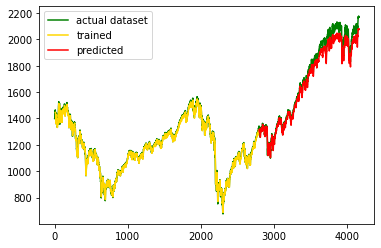

In [32]:
#function for ploting accuracy prediction
def plot_pred(dataset):
    #-- Shift train predictions for plotting --#
    trainPredictPlot = np.empty_like(dataset)
    trainPredictPlot[:, :] = np.nan
    trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict

    #-- Shift test predictions for plotting --#
    testPredictPlot = np.empty_like(dataset)
    testPredictPlot[:, :] = np.nan
    testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict

    #-- Plot baseline and predictions --#
    plt.plot(scaler.inverse_transform(dataset), c='g', label='actual dataset')
    plt.plot(trainPredictPlot, c='gold', label='trained')
    plt.plot(testPredictPlot, c='r', label='predicted')
    plt.legend(loc=2)


plot_pred(dataset)
plt.show() 